In [1]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
directory = 'archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
audio_file_names = [[file for file in os.listdir(directory) if file.endswith('.wav')][0]]
print(audio_file_names)

['101_1b1_Al_sc_Meditron.wav']


In [3]:
audio_files = {}
audio_files_sr = {}
for file_name in audio_file_names:
    audio_files[file_name], audio_files_sr[file_name] = librosa.load(f'archive/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/{file_name}')

In [4]:
target_duration = 20  
audio_padded_base = {}

for file_name in audio_files:
    audio_padded_base[file_name] = librosa.util.fix_length(audio_files[file_name], size=target_duration*audio_files_sr[file_name])

In [5]:
spectrograms_base = {}
spectrograms_dB_base = {}
mfcc_base = {}
chromagrams_base = {}
cens_base = {}
spectrograms_base[file_name] = librosa.feature.melspectrogram(y=audio_padded_base[file_name], sr=audio_files_sr[file_name], n_mels=24)
spectrograms_dB_base[file_name] = librosa.power_to_db(spectrograms_base[file_name], ref=np.max)
mfcc_base[file_name] = librosa.feature.mfcc(S=spectrograms_dB_base[file_name], n_mfcc=24)
chromagrams_base[file_name] = librosa.feature.chroma_stft(y=audio_padded_base[file_name], sr=audio_files_sr[file_name])
cens_base[file_name] = librosa.feature.chroma_cens(C=chromagrams_base[file_name], n_chroma=12)

c:\Users\mercu\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [6]:
file_name = audio_file_names[0]

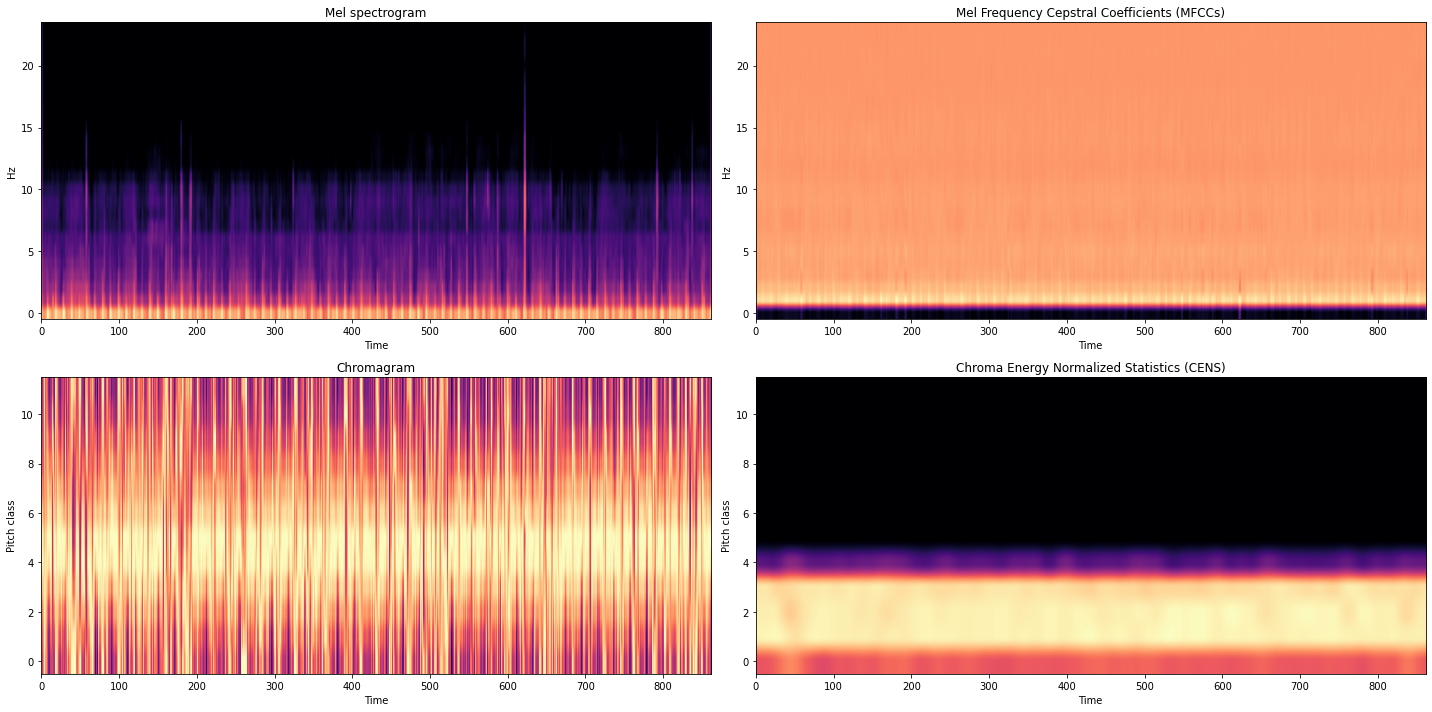

<Figure size 432x288 with 0 Axes>

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Plot Mel spectrogram
axs[0, 0].imshow(spectrograms_dB_base[file_name], aspect='auto', origin='lower', cmap='magma')
axs[0, 0].set_title('Mel spectrogram')
axs[0, 0].set_ylabel('Hz')
axs[0, 0].set_xlabel('Time')

# Plot MFCCs
axs[0, 1].imshow(mfcc_base[file_name], aspect='auto', origin='lower', cmap='magma')
axs[0, 1].set_title('Mel Frequency Cepstral Coefficients (MFCCs)')
axs[0, 1].set_ylabel('Hz')
axs[0, 1].set_xlabel('Time')

# Plot Chromagram
axs[1, 0].imshow(chromagrams_base[file_name], aspect='auto', origin='lower', cmap='magma')
axs[1, 0].set_title('Chromagram')
axs[1, 0].set_ylabel('Pitch class')
axs[1, 0].set_xlabel('Time')

# Plot CENS
axs[1, 1].imshow(cens_base[file_name], aspect='auto', origin='lower', cmap='magma')
axs[1, 1].set_title('Chroma Energy Normalized Statistics (CENS)')
axs[1, 1].set_ylabel('Pitch class')
axs[1, 1].set_xlabel('Time')

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()


In [9]:
# librosa.display.specshow(data['spectrogram'][file_name], x_axis='time', y_axis='mel')
# plt.title('Mel Spectrogram')

In [10]:
# librosa.display.specshow(mfcc_base[file_name], x_axis='time', y_axis='mel')
# plt.title('Mel Frequency Cepstral Coefficients  (MFCCs)')
# plt.savefig(f'vis_samples/mfcc_base.png', bbox_inches='tight', pad_inches=0)

In [11]:
# librosa.display.specshow(chromagrams_base[file_name], x_axis='time', y_axis='chroma')
# plt.title('Chromagram')
# plt.savefig(f'vis_samples/chromagrams_base.png', bbox_inches='tight', pad_inches=0)

In [12]:
# librosa.display.specshow(cens_base[file_name], x_axis='time', y_axis='chroma')
# plt.title('Chroma Energy Normalized Statistics (CENS)')
# plt.savefig(f'vis_samples/cens_base.png', bbox_inches='tight', pad_inches=0)

In [13]:
def generate_mel_features(audio_padded_base, audio_files_sr, audio_file_names):
    spectrograms_base = {}
    spectrograms_dB_base = {}
    mfcc_base = {}
    for file_name in tqdm(audio_file_names):
        spectrograms_base[file_name] = librosa.feature.melspectrogram(y=audio_padded_base[file_name], sr=audio_files_sr[file_name], n_mels=24)
        spectrograms_dB_base[file_name] = librosa.power_to_db(spectrograms_base[file_name], ref=np.max)
        mfcc_base[file_name] = librosa.feature.mfcc(S=spectrograms_dB_base[file_name], n_mfcc=24)
    
    return spectrograms_base, spectrograms_dB_base, mfcc_base

In [14]:
def generate_chroma_features(audio_padded_base, audio_files_sr, audio_file_names):
    chromagrams_base = {}
    cens_base = {}
    for file_name in tqdm(audio_file_names):
        chromagrams_base[file_name] = librosa.feature.chroma_stft(y=audio_padded_base[file_name], sr=audio_files_sr[file_name])
        cens_base[file_name] = librosa.feature.chroma_cens(C=chromagrams_base[file_name])
    
    return chromagrams_base, cens_base

In [85]:
def generate_noisy_audio(audio_padded_base, audio_files_sr, audio_file_names, noise_factor=0.01):
    #random_factor = (0, 0.1)
    audio_padded_noisy = {}
    for file_name in tqdm(audio_files):
        audio_padded_noisy[file_name] = audio_padded_base[file_name] + np.random.normal(0, noise_factor, audio_padded_base[file_name].shape)
    
    return audio_padded_noisy

def generate_timeshifted_audio(audio_padded_base, audio_files_sr, audio_file_names, random_factor=0.1):
    #random_factor = (0, 0.5]
    audio_timeshifted = {}
    for file_name in tqdm(audio_files):
        audio_timeshifted[file_name] = np.roll(audio_padded_base[file_name], int(audio_files_sr[file_name]*np.random.normal(0, 10*random_factor)*np.random.choice([-1, 1])))
    
    return audio_timeshifted

def generate_timestretched_audio(audio_padded_base, audio_files_sr, audio_file_names, random_factor=0.6):
    #random_factor = (0, 1)
    audio_timestretched = {}
    for file_name in tqdm(audio_files):
        audio_timestretched[file_name] = librosa.util.fix_length(librosa.effects.time_stretch(audio_padded_base[file_name], rate=abs(np.random.normal(1, 2*random_factor))), size=20*audio_files_sr[file_name])
    
    return audio_timestretched

def generate_pitchshifted_audio(audio_padded_base, audio_files_sr, audio_file_names, random_factor=8):
    # random_factor = [0,12]
    audio_pitchshifted = {}
    for file_name in tqdm(audio_files):
        audio_pitchshifted[file_name] = librosa.effects.pitch_shift(audio_padded_base[file_name], sr=audio_files_sr[file_name], n_steps=np.random.normal(0, 2*random_factor))
    
    return audio_pitchshifted

In [86]:
def save_figures(data, audio_file_names, y_axis, save_name):
    #y_axis = 'mel' or 'chroma'
    for file_name in tqdm(audio_file_names):
        librosa.display.specshow(data[file_name], x_axis='time', y_axis=y_axis)
        plt.axis('off')  # Turn off axes
        plt.xticks([])  # Remove x-axis ticks
        plt.yticks([])  # Remove y-axis ticks
        plt.savefig(f'{save_name}/{file_name[:-4]}.png', bbox_inches='tight', pad_inches=0)
        plt.close()

In [87]:
categories_all = {'noisy':generate_noisy_audio, 'timeshifted':generate_timeshifted_audio, 'timestretched':generate_timestretched_audio, 'pitchshifted':generate_pitchshifted_audio}
categories = {'noisy':generate_noisy_audio, 'timeshifted':generate_timeshifted_audio, 'timestretched':generate_timestretched_audio, 'pitchshifted':generate_pitchshifted_audio}

audio_aug = {}
for category in categories.keys():
    print(f'Generating {category} data...')
    data = categories[category](audio_padded_base, audio_files_sr, audio_file_names)
    print(f'Data generated.')
    
    audio_aug[category] = {'data':data}
    
    audio_aug[category]['spectrogram'], audio_aug[category]['spectrogram_dB'], audio_aug[category]['mfcc'] = generate_mel_features(data, audio_files_sr, audio_file_names)
    audio_aug[category]['chromagram'], audio_aug[category]['cens'] = generate_chroma_features(data, audio_files_sr, audio_file_names)


Generating noisy data...


100%|██████████| 1/1 [00:00<00:00, 42.38it/s]


Data generated.


  0%|          | 0/1 [00:00<?, ?it/s]c:\Users\mercu\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
100%|██████████| 1/1 [00:00<00:00,  6.52it/s]


Generating timeshifted data...


100%|██████████| 1/1 [00:00<00:00, 329.33it/s]


Data generated.


100%|██████████| 1/1 [00:00<00:00, 11.06it/s]


Generating timestretched data...


100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


Data generated.


100%|██████████| 1/1 [00:00<00:00, 13.43it/s]


Generating pitchshifted data...


100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


Data generated.


100%|██████████| 1/1 [00:00<00:00, 12.36it/s]


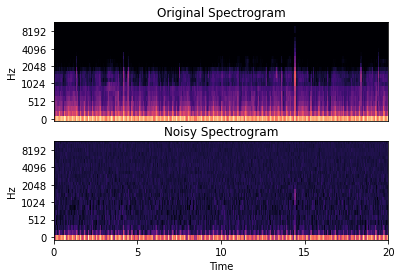

In [96]:
fig, ax = plt.subplots(2, 1)

img1 = librosa.display.specshow(spectrograms_dB_base[file_name], y_axis='mel', ax=ax[0])
ax[0].set(title='Original Spectrogram')

img2 = librosa.display.specshow(audio_aug['noisy']['spectrogram_dB'][file_name], x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Noisy Spectrogram')

plt.subplots_adjust(hspace=0.2)  # Add space between plots
plt.savefig(f'vis_samples/Noisy.png', bbox_inches='tight', pad_inches=0)

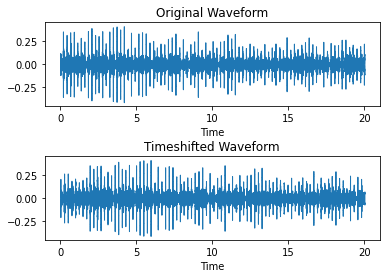

In [97]:
fig, ax = plt.subplots(2, 1)

img1 = librosa.display.waveshow(audio_padded_base[file_name], sr=audio_files_sr[file_name], ax=ax[0])
ax[0].set(title='Original Waveform')

librosa.display.waveshow(audio_aug['timeshifted']['data'][file_name], sr=audio_files_sr[file_name], label='Timeshifted Waveform', ax=ax[1])
ax[1].set(title='Timeshifted Waveform')

plt.subplots_adjust(hspace=0.6)  # Add space between plots
plt.savefig(f'vis_samples/Timeshifted.png', bbox_inches='tight', pad_inches=0)

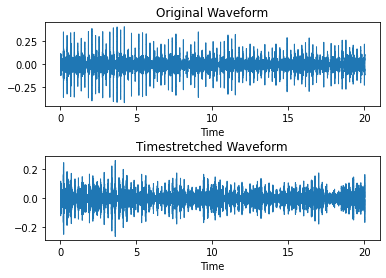

In [98]:
fig, ax = plt.subplots(2, 1)

img1 = librosa.display.waveshow(audio_padded_base[file_name], sr=audio_files_sr[file_name], ax=ax[0])
ax[0].set(title='Original Waveform')

librosa.display.waveshow(audio_aug['timestretched']['data'][file_name], sr=audio_files_sr[file_name], label='Timeshifted Waveform', ax=ax[1])
ax[1].set(title='Timestretched Waveform')

plt.subplots_adjust(hspace=0.6)  # Add space between plots
plt.savefig(f'vis_samples/Timestretched.png', bbox_inches='tight', pad_inches=0)

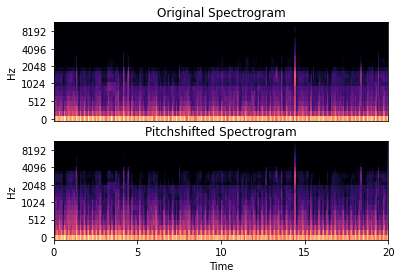

In [99]:
fig, ax = plt.subplots(2, 1)

img1 = librosa.display.specshow(spectrograms_dB_base[file_name], y_axis='mel', ax=ax[0])
ax[0].set(title='Original Spectrogram')

img2 = librosa.display.specshow(audio_aug['pitchshifted']['spectrogram_dB'][file_name], x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set(title='Pitchshifted Spectrogram')

plt.subplots_adjust(hspace=0.2)  # Add space between plots
plt.savefig(f'vis_samples/Pitchshifted.png', bbox_inches='tight', pad_inches=0)